In [3]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
movies = pandas.read_csv("fandango_score_comparison.csv")

In [2]:
movies.sample(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
10,Far From The Madding Crowd (2015),84,77,71,7.5,7.2,4.5,4.0,4.20,3.85,...,3.60,4.0,4.0,3.5,4.0,3.5,35,12129,804,0.5
87,Maggie (2015),54,32,52,6.5,5.6,3.5,3.3,2.70,1.60,...,2.80,2.5,1.5,2.5,3.5,3.0,90,18986,95,0.2
94,The Overnight (2015),82,65,65,8.6,6.9,3.5,3.3,4.10,3.25,...,3.45,4.0,3.5,3.5,4.5,3.5,13,867,110,0.2
37,Welcome to Me (2015),71,47,67,6.9,5.9,4.0,3.6,3.55,2.35,...,2.95,3.5,2.5,3.5,3.5,3.0,33,8301,56,0.4
135,The Lazarus Effect (2015),14,23,31,4.9,5.2,3.0,3.0,0.70,1.15,...,2.60,0.5,1.0,1.5,2.5,2.5,62,17691,1651,0.0


We'll primarily focus on the Metacritic_norm_round and the Fandango_Stars columns, which will let you see how Fandango and Metacritic differ in terms of review scores.

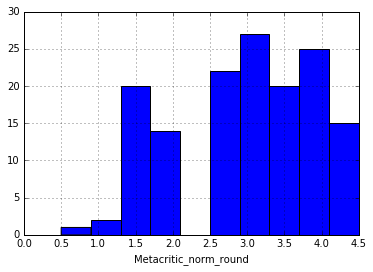

In [7]:
movies['Metacritic_norm_round'].hist()
plt.xlabel("Metacritic_norm_round")

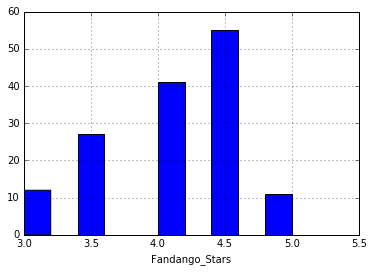

In [8]:
movies['Fandango_Stars'].hist()
plt.xlabel('Fandango_Stars')

Fandango vs Metacritic Scores
There are no scores below a 3.0 in the Fandango reviews. The Fandango reviews also tend to center around 4.5 and 4.0, whereas the Metacritic reviews seem to center around 3.0 and 3.5.

In [15]:
import numpy

f_mean = movies["Fandango_Stars"].mean()
m_mean = movies["Metacritic_norm_round"].mean()
f_std = movies["Fandango_Stars"].std()
m_std = movies["Metacritic_norm_round"].std()
f_median = movies["Fandango_Stars"].median()
m_median = movies["Metacritic_norm_round"].median()

print("Fandango_Stars mean: ",f_mean)
print("Metacritic_norm_round mean: ",m_mean)
print("Fandango_Stars Standard Deviation: ",f_std)
print("Metacritic_norm_round Standard Deviation: ",m_std)
print("Fandango_Stars Median: ",f_median)
print("Metacritic_norm_round Median: ",m_median)

Fandango_Stars mean:  4.08904109589
Metacritic_norm_round mean:  2.97260273973
Fandango_Stars Standard Deviation:  0.540385977979
Metacritic_norm_round Standard Deviation:  0.990960561374
Fandango_Stars Median:  4.0
Metacritic_norm_round Median:  3.0


Fandango appears to inflate ratings and isn't transparent about how it calculates and aggregates ratings. Metacritic publishes each individual critic rating, and is transparent about how they aggregate them to get a final rating.

The median metacritic score appears higher than the mean metacritic score because a few very low reviews "drag down" the median. The median fandango score is lower than the mean fandango score because a few very high ratings "drag up" the mean.

Fandango ratings appear clustered between 3 and 5, and have a much narrower random than Metacritic reviews, which go from 0 to 5.

Fandango ratings in general appear to be higher than metacritic ratings.

These may be due to movie studio influence on Fandango ratings, and the fact that Fandango calculates its ratings in a hidden way.

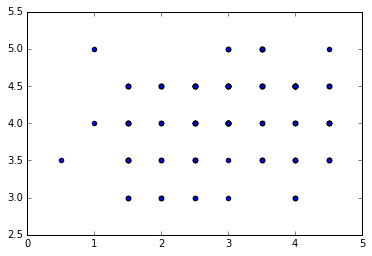

In [16]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [17]:
movies["fm_diff"] = numpy.abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])

In [18]:
movies.sort_values(by="fm_diff", ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [19]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])

r_value

0.17844919073895918

In [20]:
p_value

0.031161516228523815

The low correlation between Fandango and Metacritic scores indicates that Fandango scores aren't just inflated, they are fundamentally different. For whatever reason, it appears like Fandango both inflates scores overall, and inflates scores differently depending on the movie.

In [21]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [24]:
pred = 3 * slope + intercept

pred

4.0917071528212041

### Finding Residuals

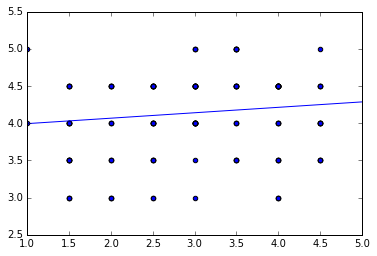

In [41]:
pred_1=  2 *  slope+  intercept
pred_5 = 5 * slope + intercept
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1,5],[pred_1,pred_5])
plt.xlim(1,5)
plt.show()